# Tutorial 1 - Simple Neural Network with Flux

In [1]:
using Flux
using Statistics, Distributions
using Plots

In [61]:
function generate_real_data(n)
    x1 = rand(1,n) .- 0.5
    x2 = (x1 .* x1)*3 .+ randn(1,n)*0.1
    return vcat(x1,x2)
end

function generate_fake_data(n)
    θ  = 2*π*rand(1,n)
    r  = rand(1,n)/3
    x1 = @. r*cos(θ)
    x2 = @. r*sin(θ)+0.5
    return vcat(x1,x2)
end
function NeuralNetwork()
    return Chain(
            Dense(2, 25,relu),
            Dense(25,1,x->σ.(x))
            )
end

NeuralNetwork (generic function with 1 method)

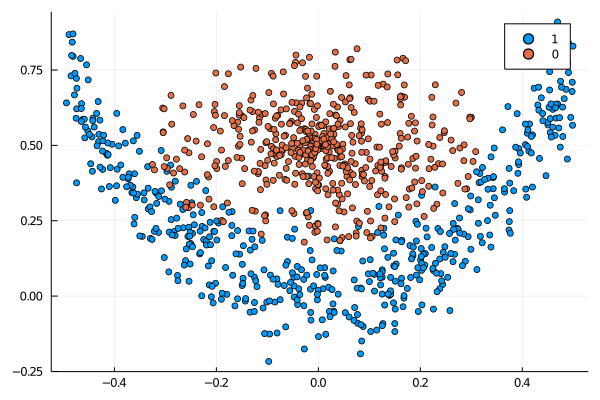

In [62]:
train_size = 5000
real = generate_real_data(train_size)
fake = generate_fake_data(train_size)

scatter(real[1,1:500],real[2,1:500],label="1")
p = scatter!(fake[1,1:500],fake[2,1:500], label="0")

In [63]:
savefig(p,"Flux_Tutorial_img1.png")

In [76]:
m    = NeuralNetwork()
opt = Descent(0.05)


X    = hcat(real,fake)
Y    = vcat(ones(train_size),zeros(train_size))
data = Flux.Data.DataLoader(X, Y', batchsize=100,shuffle=true);

loss(x, y) = sum(Flux.Losses.binarycrossentropy(m(x), y))

loss (generic function with 1 method)

### Method 1 - Using the Flux.train! function

In [77]:
ps = Flux.params(m)
epochs = 20
for i in 1:epochs
    Flux.train!(loss, ps, data, opt)
end
println(mean(m(real)),mean(m(fake)))

0.81167940.17830776


### Method 2 - Create your own Train function

In [78]:
m    = NeuralNetwork()
function trainModel!(m,data;epochs=20)
    for epoch = 1:epochs
        for d in data
            gs = gradient(Flux.params(m)) do
                l = loss(d...)
            end
            Flux.update!(opt, Flux.params(m), gs)
        end
    end
    @show mean(m(real)),mean(m(fake))
end
trainModel!(m,data;epochs=20)

(mean(m(real)), mean(m(fake))) = (0.8155521f0, 0.2035279f0)


(0.8155521f0, 0.2035279f0)

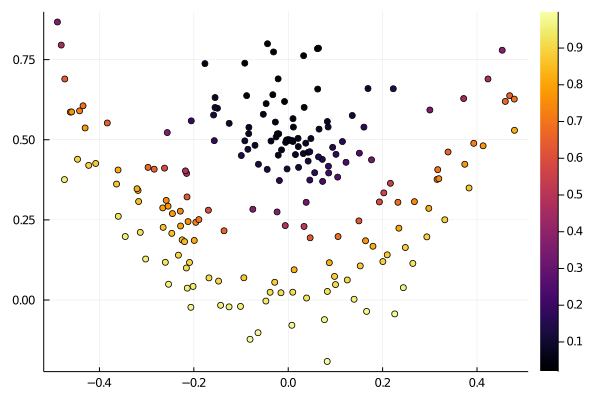

In [79]:
l = 100
scatter(real[1,1:l],real[2,1:l],zcolor=m(real)')
p = scatter!(fake[1,1:l],fake[2,1:l],zcolor=m(fake)',legend=false)

In [80]:
savefig(p,"Flux_Tutorial_img2.png")